載入所需函式庫

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.neighbors import KNeighborsClassifier
from google.colab import drive 
drive.mount("/content/drive")

Mounted at /content/drive


導入資料

In [ ]:
# df = pd.read_csv("/kaggle/input/2022-data-science-hw1/train.csv")
# test = pd.read_csv("/kaggle/input/2022-data-science-hw1/test.csv")
df = pd.read_csv("/content/drive/MyDrive/data mining/train.csv")
test = pd.read_csv("/content/drive/MyDrive/data mining/test.csv")

EDA

查看有哪些特徵

In [ ]:
col_names = df.columns
col_names

Index(['Attribute1', 'Attribute2', 'Attribute3', 'Attribute4', 'Attribute5',
       'Attribute6', 'Attribute7', 'Attribute8', 'Attribute9', 'Attribute10',
       'Attribute11', 'Attribute12', 'Attribute13', 'Attribute14',
       'Attribute15', 'Attribute16', 'Attribute17'],
      dtype='object')

In [ ]:
df.isnull().sum()

Attribute1        0
Attribute2        0
Attribute3       71
Attribute4       32
Attribute5      161
Attribute6     7401
Attribute7     8231
Attribute8     1093
Attribute9     1086
Attribute10     432
Attribute11     306
Attribute12     415
Attribute13    1669
Attribute14    6952
Attribute15     294
Attribute16     161
Attribute17       0
dtype: int64

查看目標值的分佈情況

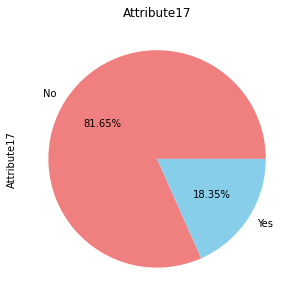

In [ ]:
plt.figure( figsize=(8,5) )
df["Attribute17"].value_counts().plot( kind='pie', colors=['lightcoral','skyblue'], autopct='%1.2f%%' )
plt.title( 'Attribute17' ) 
plt.show()

In [ ]:
df['Attribute17'].value_counts(dropna=False)

No     13965
Yes     3138
Name: Attribute17, dtype: int64

先將類別型資料轉換成數值型

In [ ]:
le = LabelEncoder()
df['Attribute1'] = le.fit_transform(df["Attribute1"])
df['Attribute8'] = le.fit_transform(df["Attribute8"])
df['Attribute10'] = le.fit_transform(df["Attribute10"])
df['Attribute16'] = le.fit_transform(df["Attribute16"])
df['Attribute17'] = le.fit_transform(df["Attribute17"])


查看下雨與其他特徵的關聯性

In [ ]:
df.corr()["Attribute17"]

Attribute1    -0.009174
Attribute2     0.008545
Attribute3     0.068023
Attribute4    -0.156697
Attribute5     0.244154
Attribute6    -0.114719
Attribute7    -0.424726
Attribute8     0.059240
Attribute9     0.227106
Attribute10    0.038399
Attribute11    0.087635
Attribute12    0.420108
Attribute13   -0.216335
Attribute14    0.343738
Attribute15   -0.186541
Attribute16    0.290959
Attribute17    1.000000
Name: Attribute17, dtype: float64

與目標較無關聯的特徵

In [ ]:
print(df.columns[df.corr()["Attribute17"].abs() < 0.1])

Index(['Attribute1', 'Attribute2', 'Attribute3', 'Attribute8', 'Attribute10',
       'Attribute11'],
      dtype='object')


與目標較有關聯的特徵

In [ ]:
print(df.columns[df.corr()["Attribute17"].abs() > 0.1])

Index(['Attribute4', 'Attribute5', 'Attribute6', 'Attribute7', 'Attribute9',
       'Attribute12', 'Attribute13', 'Attribute14', 'Attribute15',
       'Attribute16', 'Attribute17'],
      dtype='object')


可以得知最高溫度、降雨量、蒸發量、陽光出現時數、陣風速度，下午三點相對溼度，雲層覆蓋天空比例等等資訊較有關連

反之日期、氣象站地區、最強陣風方向、下午三點的風向與目標較無關聯

查看其他特徵的分佈狀況

偏態+峰度: 
--------------------------------
Attribute1:
偏態: -0.05
峰度: -1.18
Attribute1分佈圖:


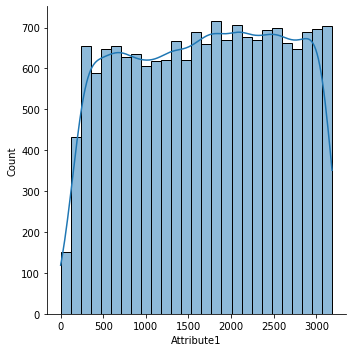

--------------------------------
--------------------------------
Attribute2:
偏態: 0.02
峰度: -1.24
Attribute2分佈圖:


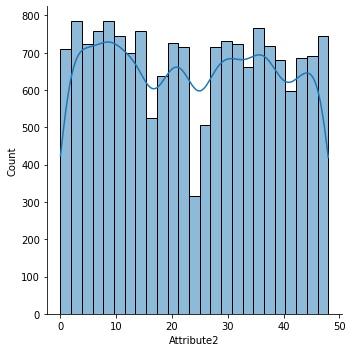

--------------------------------
--------------------------------
Attribute3:
偏態: 0.01
峰度: -0.47
Attribute3分佈圖:


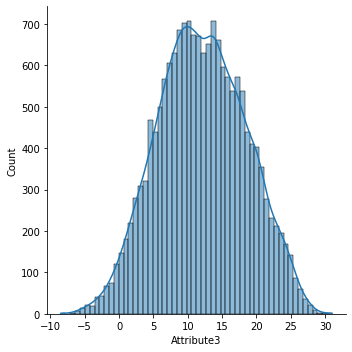

--------------------------------
--------------------------------
Attribute4:
偏態: 0.23
峰度: -0.25
Attribute4分佈圖:


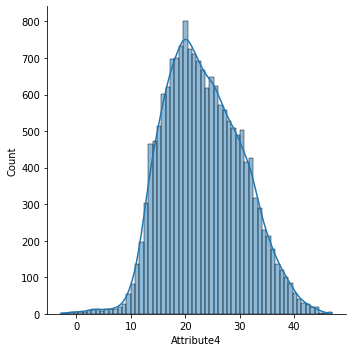

--------------------------------
--------------------------------
Attribute5:
偏態: 8.30
峰度: 100.25
Attribute5分佈圖:


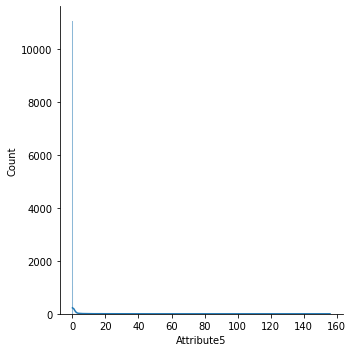

--------------------------------
--------------------------------
Attribute6:
偏態: 3.60
峰度: 34.26
Attribute6分佈圖:


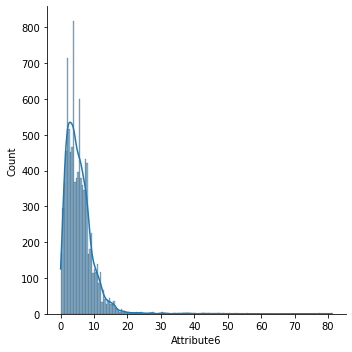

--------------------------------
--------------------------------
Attribute7:
偏態: -0.56
峰度: -0.71
Attribute7分佈圖:


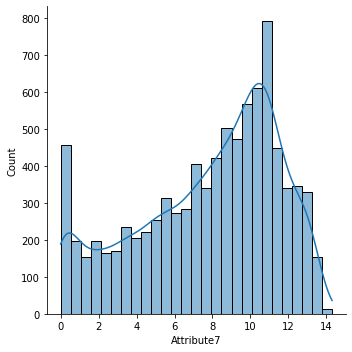

--------------------------------
--------------------------------
Attribute8:
偏態: -0.11
峰度: -1.21
Attribute8分佈圖:


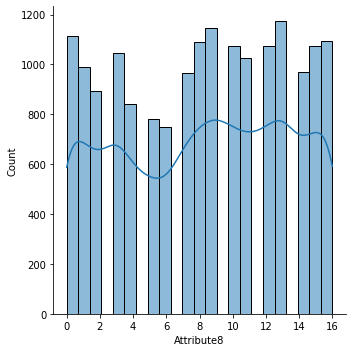

--------------------------------
--------------------------------
Attribute9:
偏態: 0.92
峰度: 1.74
Attribute9分佈圖:


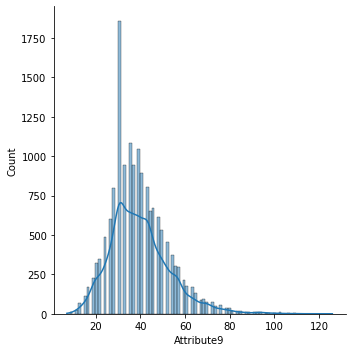

--------------------------------
--------------------------------
Attribute10:
偏態: -0.08
峰度: -1.17
Attribute10分佈圖:


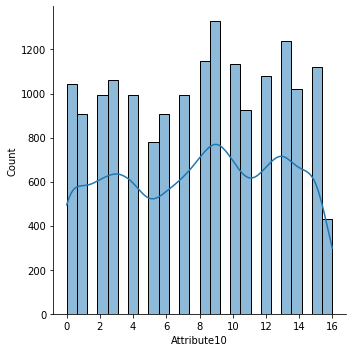

--------------------------------
--------------------------------
Attribute11:
偏態: 0.65
峰度: 0.84
Attribute11分佈圖:


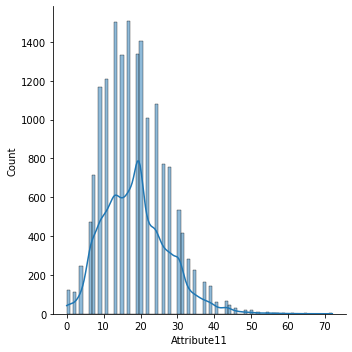

--------------------------------
--------------------------------
Attribute12:
偏態: 0.03
峰度: -0.49
Attribute12分佈圖:


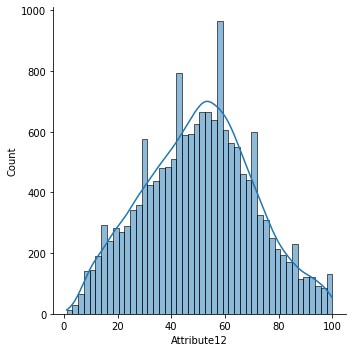

--------------------------------
--------------------------------
Attribute13:
偏態: -0.05
峰度: 0.17
Attribute13分佈圖:


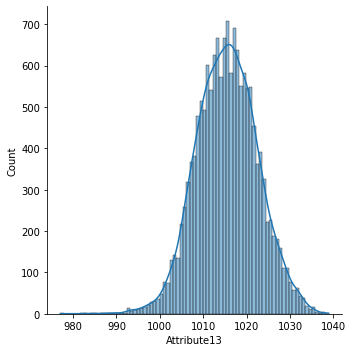

--------------------------------
--------------------------------
Attribute14:
偏態: -0.19
峰度: -1.46
Attribute14分佈圖:


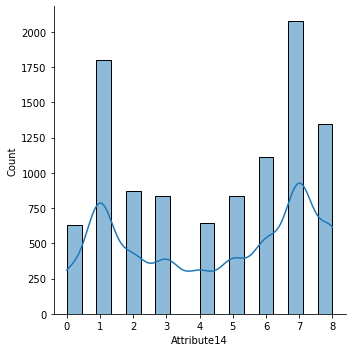

--------------------------------
--------------------------------
Attribute15:
偏態: 0.25
峰度: -0.15
Attribute15分佈圖:


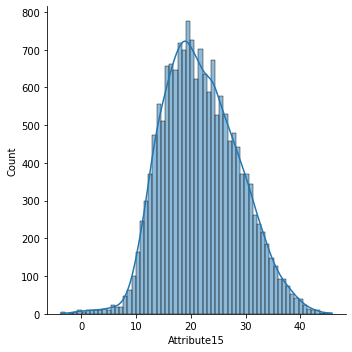

--------------------------------
--------------------------------
Attribute16:
偏態: 1.63
峰度: 1.48
Attribute16分佈圖:


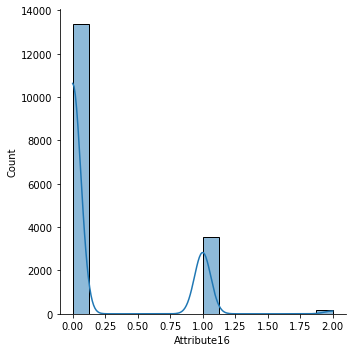

--------------------------------
--------------------------------
Attribute17:
偏態: 1.64
峰度: 0.68
Attribute17分佈圖:


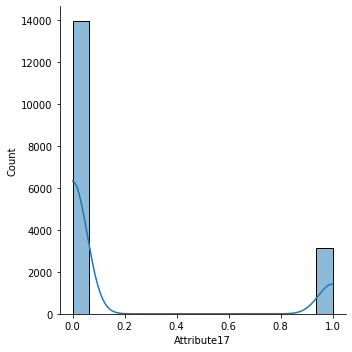

--------------------------------


In [ ]:
def Skewness_Kurtosis_distributed(df_name, feature_name):
  print("--------------------------------")
  print(feature_name + ":")
  print("偏態: {:.2f}".format(df_name[feature_name].skew()))
  print("峰度: {:.2f}".format(df_name[feature_name].kurt()))
  print(feature_name + "分佈圖:")
  sns.displot(df_name[feature_name], kde=True)
  plt.show()
  print("--------------------------------")


print("偏態+峰度: ")
for i in df:
  Skewness_Kurtosis_distributed(df, i)

從將資料視覺化後可得知特徵3、4、5、6、13、15峰值較高，特徵5、6、9、11右偏，特徵13左偏

利用箱型圖檢測離群值

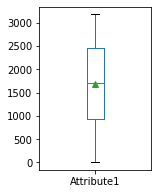

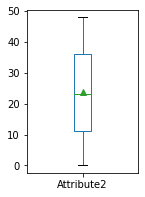

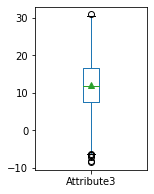

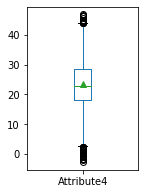

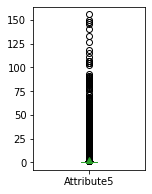

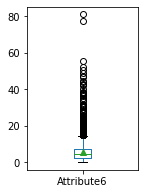

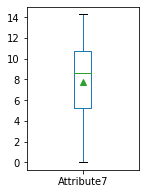

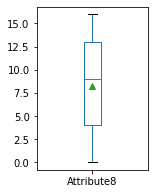

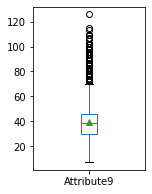

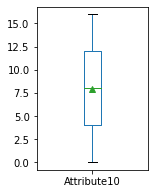

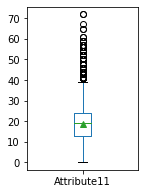

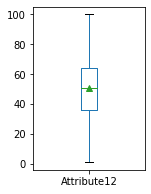

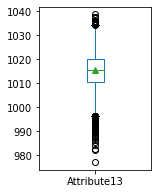

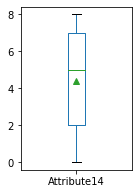

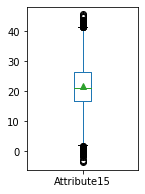

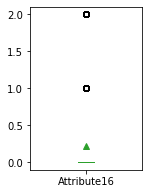

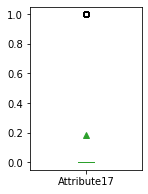

In [ ]:
def Detect_outliers(df, feature_name):
  plt.figure(figsize=(2,3))
  df.boxplot(column = feature_name, grid = False, showmeans = True)

for i in df:
  Detect_outliers(df, i)

可以得知特徵4、5的離群值非常多

對訓練資料做處理

將與預測目標無關的特徵移除

In [ ]:
df = df.drop(["Attribute1", "Attribute2", "Attribute3" ,"Attribute8", "Attribute10", "Attribute11"], axis = 1)
df

,Attribute4,Attribute5,Attribute6,Attribute7,Attribute9,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17
0,28.0,0.0,NaN,NaN,24.0,16.0,1012.8,NaN,26.5,0,0
1,26.7,0.0,NaN,NaN,35.0,19.0,1010.1,NaN,25.5,0,0
2,21.7,2.2,NaN,NaN,31.0,91.0,1004.2,8.0,17.0,1,1
3,18.6,15.6,NaN,NaN,61.0,93.0,993.0,8.0,15.8,1,1
4,37.9,0.0,NaN,NaN,52.0,8.0,1006.7,NaN,36.8,0,0
...,...,...,...,...,...,...,...,...,...,...,...
17098,22.2,0.0,NaN,NaN,37.0,34.0,1021.7,8.0,21.0,0,0
17099,21.7,0.0,NaN,NaN,43.0,19.0,1025.0,NaN,20.5,0,0
17100,19.1,0.0,NaN,NaN,33.0,24.0,1026.2,NaN,18.8,0,0
17101,20.6,0.0,NaN,NaN,35.0,33.0,1023.3,NaN,20.3,0,0


將空值都填上中位數

In [ ]:
df["Attribute4"] = df["Attribute4"].fillna(df["Attribute4"].median())
df["Attribute6"] = df["Attribute6"].fillna(df["Attribute6"].median())
df["Attribute9"] = df["Attribute9"].fillna(df["Attribute9"].median())
df["Attribute12"] = df["Attribute12"].fillna(df["Attribute12"].median())
df["Attribute14"] = df["Attribute14"].fillna(df["Attribute14"].median())
df["Attribute13"] = df["Attribute13"].fillna(df["Attribute13"].median())

將離群值較多的特徵移除離群值

In [ ]:
def remove_outliers(feature_name, df):
  IQR = df[feature_name].quantile(0.75) - df[feature_name].quantile(0.25) 
  df = df[df[feature_name] < df[feature_name].quantile(0.75)+(1.5 * IQR)]
  df = df[df[feature_name] > df[feature_name].quantile(0.25)-(1.5 * IQR)]
  return df

df = remove_outliers("Attribute4", df)
df = remove_outliers("Attribute5", df)
df = remove_outliers("Attribute6", df)
df = remove_outliers("Attribute7", df)
df = remove_outliers("Attribute9", df)
df = remove_outliers("Attribute12", df)
df = remove_outliers("Attribute13", df)
df = remove_outliers("Attribute15", df)




移除剩下的空值

In [ ]:
df = df.dropna()
df.isnull().sum()

Attribute4     0
Attribute5     0
Attribute6     0
Attribute7     0
Attribute9     0
Attribute12    0
Attribute13    0
Attribute14    0
Attribute15    0
Attribute16    0
Attribute17    0
dtype: int64

處理偏態

使用對數轉換處理右偏的特徵5、6、9

In [ ]:
df["Attribute5"] = np.log1p(df["Attribute5"])
df["Attribute6"] = np.log1p(df["Attribute6"])
df["Attribute9"] = np.log1p(df["Attribute9"])

使用次方轉換左偏特徵7

In [ ]:
df["Attribute7"] = np.power(df["Attribute7"], 2)

切割資料

In [ ]:
train_X = df.drop(['Attribute17'], axis = 1)
train_Y = df['Attribute17']

In [ ]:
train_X

,Attribute4,Attribute5,Attribute6,Attribute7,Attribute9,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16
776,32.3,0.000000,1.945910,127.69,3.218876,16.0,1012.7,1.0,30.8,0
782,20.4,0.000000,1.722767,100.00,3.465736,35.0,1016.6,3.0,19.2,0
785,20.8,0.182322,1.335001,102.01,3.850148,49.0,1015.4,3.0,20.4,0
787,17.8,0.000000,1.223775,67.24,3.295837,42.0,1024.3,6.0,17.6,0
789,12.8,0.000000,1.163151,37.21,3.135494,50.0,1019.5,4.0,12.4,0
...,...,...,...,...,...,...,...,...,...,...
16705,34.5,0.000000,1.757858,112.36,3.737670,32.0,1009.7,3.0,34.0,0
16706,31.8,0.000000,2.001480,116.64,3.850148,26.0,1012.6,1.0,31.0,0
16707,29.4,0.000000,2.174752,75.69,3.891820,24.0,1013.5,7.0,28.5,0
16708,33.4,0.000000,1.945910,121.00,3.583519,32.0,1010.5,1.0,32.3,0


In [ ]:
train_Y

776      0
782      0
785      0
787      0
789      0
        ..
16705    0
16706    0
16707    0
16708    0
16709    0
Name: Attribute17, Length: 4486, dtype: int64

因目標值分佈不均，所以進行採樣

In [ ]:
train_X, train_Y = SMOTE().fit_resample(train_X, train_Y)
train_X, train_Y = TomekLinks().fit_resample(train_X, train_Y)

採樣後的資料分佈

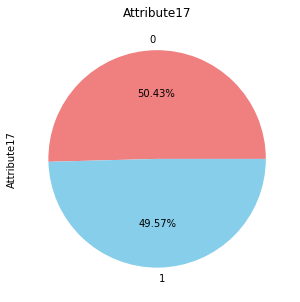

In [ ]:
plt.figure(figsize=(8,5))
train_Y.value_counts().plot( kind='pie', colors=['lightcoral','skyblue'], autopct='%1.2f%%' )
plt.title( 'Attribute17' )
plt.show()

連續變數離散化

Attribute4     
Attribute5    
Attribute6     
Attribute7    
Attribute9     
Attribute12    
Attribute13    
Attribute14    
Attribute15    
Attribute16   
Attribute17    
dtype: int64

In [ ]:
# df["Attribute4"] = pd.cut(df["Attribute5"], 10)
# df["Attribute5"] = pd.cut(df["Attribute5"], 3)
# df["Attribute6"] = pd.cut(df["Attribute6"], 10)
# df["Attribute7"] = pd.cut(df["Attribute7"], 10)
# df["Attribute9"] = pd.cut(df["Attribute9"], 10)
# df["Attribute12"] = pd.cut(df["Attribute12"], 10)
# df["Attribute13"] = pd.cut(df["Attribute13"], 10)
# df["Attribute13"] = pd.cut(df["Attribute15"], 10)
# print(df["Attribute5"])

對測試資料做處理

移除與目標值較無相關的特徵

In [ ]:
test = test.drop(["Attribute1", "Attribute2", "Attribute3" ,"Attribute8", "Attribute10", "Attribute11"], axis = 1)
test

,Attribute4,Attribute5,Attribute6,Attribute7,Attribute9,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16
0,19.5,0.2,3.4,2.9,28.0,56.0,1011.5,8.0,16.8,No
1,17.7,0.0,13.0,9.7,63.0,24.0,1011.4,5.0,16.3,No
2,33.5,0.0,13.6,12.5,39.0,13.0,1012.0,1.0,30.7,No
3,30.3,0.0,8.6,11.4,28.0,18.0,1017.5,1.0,28.8,No
4,13.3,4.6,1.8,0.0,39.0,83.0,1007.9,7.0,13.2,Yes
...,...,...,...,...,...,...,...,...,...,...
801,33.9,0.0,6.8,10.8,52.0,32.0,1012.3,3.0,33.4,No
802,33.4,0.0,7.2,10.5,41.0,29.0,1011.3,1.0,32.1,No
803,37.5,0.0,8.0,11.5,50.0,16.0,1009.1,1.0,36.8,No
804,33.6,2.4,3.4,7.5,35.0,60.0,1004.3,6.0,32.9,Yes


將類別型資料轉換成數值型

In [ ]:
test['Attribute16'] = le.fit_transform(test["Attribute16"])

In [ ]:
test.isnull().sum()

Attribute4     0
Attribute5     0
Attribute6     0
Attribute7     0
Attribute9     0
Attribute12    0
Attribute13    0
Attribute14    0
Attribute15    0
Attribute16    0
dtype: int64

模型訓練

In [ ]:
xgboostModel = KNeighborsClassifier()
xgboostModel.fit(train_X, train_Y)

print('訓練準確率: %.5f' % xgboostModel.score(train_X, train_Y))

訓練準確率: 0.90710


將答案輸出成CSV

In [ ]:
predict_y = xgboostModel.predict(test)
output = pd.DataFrame(predict_y)
output.index = output.index.astype(float)
output.to_csv("submission.csv",header=['ans'],index_label='id')